## Practical Exploration of Hebbian Learning - Part 2

Marek Grzes

University of Kent

COMP6360/8360, Teaching week 10

Last modified 13/11/2022

This exploration complements chapter 4 in O'Reilly & Munakata (2000) that introduces Hebbian learning and Principal Component Analysis.

# Contents
- [Question 1 - PCA Applied to Iris Data](#Question-1---PCA-Applied-to-Iris-Data)
- [Question 2 - Dataset Creation](#Question-2---Dataset-Creation)
- [Question 3 - Scatterplot for Reconstruction Errors](#Question-3---Scatterplot-for-Reconstruction-Errors)
- [Question 4 - Hebbian Learning vs Task Learning](#Question-4---Hebbian-Learning-vs-Task-Learning)
- [Question 5 - Eigenfaces](#Question-5---Eigenfaces)
- [References](#References)

## Question 1 - PCA Applied to Iris Data

The PCA implementation in this section is based on this example:
https://scikit-learn.org/stable/auto_examples/decomposition/plot_incremental_pca.html#sphx-glr-auto-examples-decomposition-plot-incremental-pca-py

Read and run the code that is below, and answer the questions afterwards. The questions are at the end of this section.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# load the data from sklearn
iris = load_iris()

# X is np.ndarray and it contains four predictor attributes
X = iris.data
y = iris.target

# print descriptive statistics using pandas data frame
df_X = pd.DataFrame(X)
print(df_X.describe())


                0           1           2           3
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.057333    3.758000    1.199333
std      0.828066    0.435866    1.765298    0.762238
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000


Next, we will run PCA. We will compute 2 principal components for the Iris dataset using <code>sklearn.decomposition.PCA</code>. Documentation for this function is here https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [2]:
# the number of principal components
n_components = 2

pca = PCA(n_components=n_components)

In [3]:
# We fit the model and then transform the data.

# Fit the model to the data; this is where PCA will do what Hebbian learning does to compute one principal component
pca.fit(X)

# print the principal components
print(pca.components_)

# we can now transform the data and project it to 2 dimensions.
X_pca = pca.transform(X)

print(X_pca[:5,:])
print(X[:5,:])

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


Next, we visualise the Iris dataset in 2 dimensions defined by the 2 PCs. We use `matplotlib`'s scatterplot.

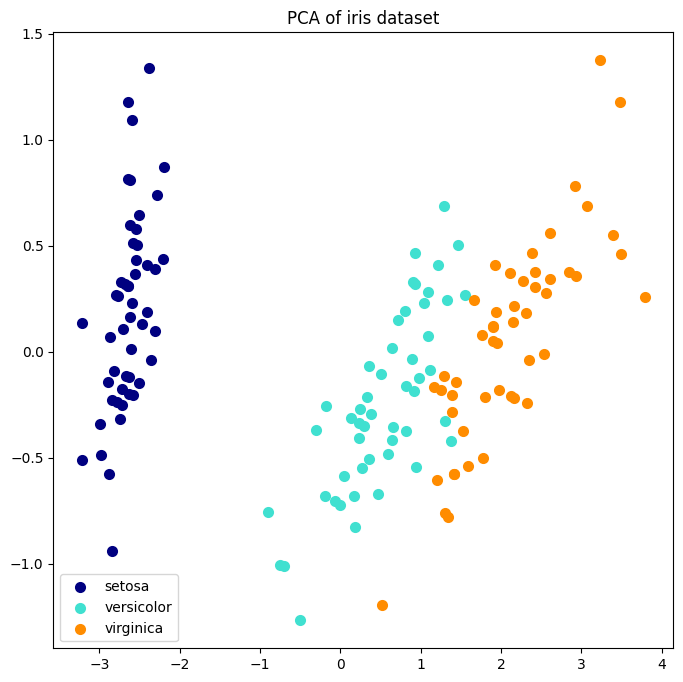

In [4]:
colors = ['navy', 'turquoise', 'darkorange']
title = "PCA"

plt.figure(figsize=(8, 8))
for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    # note that y are targets defined above
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
                    color=color, lw=2, label=target_name)

plt.title(title + " of iris dataset")
plt.legend(loc="best", shadow=False, scatterpoints=1)

plt.show()

- **(1-1):** In the above code, identify Python variables that correspond to the weights $w$ in our lecture notes. Is $w$ a scalar or a vector? If it is a vector, what is its dimensionality?

- **(1-2):** In the above code, identify Python variables that correspond to the symbol $y_j$ in our lecture notes. What is the range of $j$ in this example? How does the number of values of $y_j$ relate to the number of data examples?

- **(1-3):** The original Iris data is transformed in the following line `X_pca = pca.transform(X)` in the code above. You are asked to write your own implementation of this step; a dedicated function is not required.
    1. Use whatever method you can think of to implement this step. For example, you can write `for` loops to implement the summations that are shown in lecture slides.
    2. Use the `numpy.matmul` function to do the transformation.

  Note that your result will be identical with the result of `pca.transform` when your data `X` is centred (i.e. the mean of a column is subtracted from every value in the column) before the transformation. This is because `pca.transform` centres the data before the projection (see its code; the implementation can be found here:
https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/decomposition/_base.py).

## Question 2 - Dataset Creation

- **(2-1)** Create a small dataset (100-1000 samples) with real valued attributes in which feature 1 is not correlated with any features, features 2 and 3 are positively correlated, and features 4 and 5 are positively correlated with each other, but negatively correlated with features 2 and 3. You can implement this step using the `np.random.normal` function, which returns samples from a normal distribution as it is shown below.

In [12]:
mu, sigma = 0, 0.1 # mean and standard deviation
# sample 10 points using the parameters defined above
data = np.random.normal(mu, sigma, (100, 5))
print(data)

[[-1.21924462e-01  2.01848162e-01 -1.76662847e-01 -2.25768059e-02
   9.12778771e-02]
 [-6.84057147e-02 -2.68205308e-02 -1.44815311e-02  1.21898278e-01
  -2.00721990e-01]
 [ 5.73077919e-02 -1.20462008e-01 -8.73666837e-02 -3.19235356e-02
  -1.21257612e-01]
 [-1.75517016e-01  2.80590784e-03 -9.31204612e-02 -9.27252416e-03
   9.01035171e-02]
 [ 1.28231421e-01  6.24545932e-02  1.21322589e-01  5.74613022e-02
  -1.82932804e-01]
 [-1.03161742e-01 -5.18905055e-02 -3.23916619e-01  1.42987414e-01
   6.45663480e-02]
 [-8.98562359e-02 -8.53259120e-02  1.86005751e-01  7.66279521e-02
  -9.17374424e-02]
 [ 1.37432739e-01  1.94524762e-01  1.90968181e-01 -4.69004072e-02
   9.59466443e-02]
 [ 6.53212506e-02 -8.28214364e-02  2.90353638e-02 -1.09440170e-01
  -6.51212367e-02]
 [-2.68855874e-02  1.14768818e-01  4.27984232e-02  1.06717869e-02
   4.14612994e-02]
 [-3.34249282e-01 -1.83090896e-02 -2.03912795e-02  3.75768791e-02
  -6.56661299e-02]
 [-2.80402683e-02  6.84440786e-02 -1.01450342e-01 -8.53054182e-02

In [13]:
print("correlation matrix computed using numpy")
print(np.corrcoef(data.transpose()))

correlation matrix computed using numpy
[[ 1.          0.12372276  0.06671173 -0.03817266  0.02262581]
 [ 0.12372276  1.          0.11499419 -0.11372128  0.1924853 ]
 [ 0.06671173  0.11499419  1.         -0.00298629 -0.00927404]
 [-0.03817266 -0.11372128 -0.00298629  1.         -0.1314058 ]
 [ 0.02262581  0.1924853  -0.00927404 -0.1314058   1.        ]]


In [16]:
#2-3 expects u to understand what a weight is and present your own idea of the weight vectorfor this dataset

[[-0.06840571 -0.02682053 -0.01448153  0.12189828 -0.20072199]
 [ 0.05730779 -0.12046201 -0.08736668 -0.03192354 -0.12125761]
 [-0.17551702  0.00280591 -0.09312046 -0.00927252  0.09010352]
 [ 0.12823142  0.06245459  0.12132259  0.0574613  -0.1829328 ]]
initial weights
[ 0.69952713 -0.58416263 -0.59817006  1.09007326 -0.42424909]
	Current input: [-0.02688559  0.11476882  0.04279842  0.01067179  0.0414613 ]
New Weights:
[ 0.69948064 -0.58538534 -0.59920792  1.09087797 -0.4254024 ]
	Current input: [-0.01386872  0.03904131 -0.01975491 -0.05533229 -0.01347328]
New Weights:
[ 0.6997482  -0.58597621 -0.59924349  1.0914458  -0.42571348]
	Current input: [ 0.17143646  0.14861149  0.022233   -0.24091986 -0.02238669]
New Weights:
[ 0.69985297 -0.58658361 -0.59892433  1.09368377 -0.42621562]
	Current input: [-0.07487667 -0.0636624  -0.08935283 -0.04400288 -0.07535778]
New Weights:
[ 0.70016529 -0.58658673 -0.59940891  1.09488701 -0.42610995]
	Current input: [ 0.0678141   0.10378134 -0.06521563  0.1

- **(2-2)** Compute and print the correlation matrix for your dataset to verify that your dataset has required correlations between its variables. You can use any available functions to compute correlation (there is no need to implement correlation from scratch).
- **(2-3)** Given the properties of the Hebbian learning algorithm, write an example vector of weights $w$ that can be learned on your data.
- **(2-4)** Run your implementation of Oja's rule developed in the previous week (or `sklearn`'s PCA) to compute the weights of the first principal component. Compare the results with your answers to the previous sub-question.


## Question 3 - Scatterplot for Reconstruction Errors

First, study the code presented below. It loads the wine dataset (https://archive.ics.uci.edu/ml/datasets/wine), selects two of its features (`flavanoids` and `total_phenols`), and runs PCA to extract 1 principal component from the resulting 2D data.

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt

wine = load_wine()
#dfwine = pd.DataFrame(wine.data, columns=wine.feature_names)
#print(dfwine.corr())

# we select 2 features that are correlated in this dataset
ind = [wine['feature_names'].index('flavanoids'), wine['feature_names'].index('total_phenols')]
data = wine.data[:,ind]
# we centre the data to make the code below simpler
data = data - np.mean(data, axis=0)
print(data[0:5,:])

# we will extract 1 component; note that our data is 2D
n_components = 1

pca = PCA(n_components=n_components)

# We fit the model and transform the data in one line.
data_pca = pca.fit_transform(data)
print("the parameters/axis")
print(pca.components_)
print("data_pca is the 1D representation of our data:")
print(data_pca[1:5])

# plot the data with the first PC
plt.scatter(data[:,0], data[:,1])
plt.quiver(pca.components_[0][0], pca.components_[0][1], color=['red'], scale=2)
plt.show()

# data is the original data, and data_pca is the low dimensional representation of the data
# your next step is to compute data_rec, which will be the reconstruction of the original data using data_pca
# we are interested in the errors between data and data_rec

When the execution of the above block ends, `data` contains the original 2D data (after centring), and `data_pca` is the 1D compressed data. We will also need `data_rec`, that is, the reconstruction of the original data from the 1D representation stored in `data_pca`.
- **(3-1)** Compute `data_rec`, which is the reconstruction of the original data from its compressed 1D representation that is stored in `data_pca`.
- **(3-2)** Explain the difference between `data` and `data_rec`, and the role of `data_pca` in this relationship. In this question, you are only asked to interpret the result and the variables in question. Your interpretation will be more insightful if you visualise `data_rec` on a scatterplot similar to the one that we used to plot the original `data`. Create such a scatterplot and include it in your comparison of `data_rec` and `data`.
- **(3-3)** Compute an error array/matrix with the difference between `data` and `data_rec`. Such a matrix will represent an error of the reconstruction for every data example (row) on every feature (column).
- **(3-4)** Since the error matrix is 2D in this example, you can visualise it on a 2D scatterplot. Create such a plot using the `matplotlib.pyplot.scatter` function.
- **(3-5)** This last question is the most important. Analyse the scatterplot carefully and explain why a particular pattern can be observed, i.e., explain why the points on the scatterplot form a particular structure or pattern.

## Question 4 - Hebbian Learning vs Task Learning

Our goal in this question is to create a dataset such that its mapping between inputs and outputs will be solved with higher accuracy using task learning methods, and Hebbian learning will fail to learn the mapping with the same accuracy. We will start with the data in `data_2D_normal_with_class.txt`, in which the first two columns / features are inputs ($X_1$ and $X_2$), and the third column contains the desired output, i.e., the dependent attribute $Y$. This desired output $Y$ is provided by the "teacher" in task learning in general. The first five rows from this dataset are printed below.

In [ ]:
import numpy as np

# load data from the text file
data = np.loadtxt('data_2D_normal_with_class.txt', usecols=range(3))
print("original data")
print(data[0:5,:])

The dependent attribute $Y$ has values in the set $\{0,...,9\}$, and the values of $Y$ were selected randomly in the current version of these data. This means that, for every row or data sample, the mapping $(x_1,x_2)\rightarrow y$ is random. Such a random mapping represents a challenging task for task learning. For this reason, in this section, you will modify the values of the third column (i.e. the column $Y$) to make this problem easy to solve for task learning, and hard to solve for Hebbian learning. But, first, read the Python block below, and study it to understand what it does.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# the number of principal components
n_components = 1

pca = PCA(n_components=n_components)

# print(data[:,0:2])

# Fit the model to the data; this is where Hebbian learning will happen
pca.fit(data[:,0:2])

# print the principal components
print(pca.components_)

# plot these data with current labels

colors = [(0, 0, 0), (0.1, 0.1, 0.1), (0.2, 0.2, 0.2), (0.3, 0.3, 0.3), (0.4, 0.4, 0.4), (0.5, 0.5, 0.5), (0.6, 0.6, 0.6), (0.7, 0.7, 0.7), (0.8, 0.8, 0.8), (0.9, 0.9, 0.9)]

plt.figure(figsize=(8, 8))
plt.axis('equal')
for color, i in zip(colors, range(10)):
    yi = data[data[:,2] == i]
    plt.scatter(yi[:, 0], yi[:, 1], color=color, lw=2)

# The first principal component will be visualised as a red vector on the scatterplot.
plt.quiver(pca.components_[0][0], pca.components_[0][1], color=['red'], scale=2)

plt.title("Simple 2D data")
#plt.legend(loc="best", shadow=False, scatterpoints=1)

plt.show()

# In order to answer this question, you may want to use the Hebbian learning model that is stored in the pca object. The pca object was created above. You can just use it here. There is no need to run Hebbian learning again, but you may need to compute the value of y_j for every input.

Extend this code to implement the following.

- **(4-1)** Change the values of the third column in such a way that the error (i.e. the differences between the values of $y_j$ computed by Hebbian learning and the true values of $Y$) will be minimised. You are free to choose any method to implement this step.
- **(4-2)** Create a new scatterplot for your new data after you have modified the third column, $Y$, in the previous step. Discuss how the change of colour of your points on the scatterplot correlates with the direction of the principal component on the scatterplot. Actually, to complete the previous step, you will need to consider this association, and it will be clearly seen on the scatterplot now.
- **(4-3)** In the previous steps, you changed $Y$ to make the error small. Now, you will change the $Ys$ to make this task challenging for Hebbian learning. You are expected to plan two solutions. The first one will be trivial, and it will extend the one that minimised the error, and the other one should be substantially different form the first one.
- **(4-4)** Again, visualise the data designed in the previous step. You will obtain two scatterplots if two solutions were identified in the previous step. Discuss how the colour of your data points on the scatterplot correlates with the direction of the red principal component on the graph.
- **(4-5)** This part should be done after delta rule has been presented in lectures. Analyse all the datasets provided and created for this question, and explain which of them would be easy to solve for delta rule. Explain why Hebbian learning had to fail in some cases, and why delta rule can solve them.

Note that the code above assumes that $Y$ has values that are integers in $\{0,...,9\}$, and the values from this set are mapped to appropriate colours when the scatterplot is generated. If your values of $Y$ are in a different range, you may want to scale them to be in the range 0-9, and then to round them to integers. This way you will be able to reuse the current code that generates the scatterplot.

## Question 5 - Eigenfaces

This is an open-ended challenge question that will allow you to implement some pretty visualisations, and to practice our material related to PCA. The previous questions in this document showed how to use PCA in `sklearn`. Now, we would like you to use PCA to generate eigenfaces for an arbitrary set of human faces (you could choose a specific animal instead of humans if you wish).

Note that human faces in the *The Olivetti faces dataset* in `sklearn` are 64x64 pixels, and they are centred and appropriately cropped to make the task easier (not that PCA is effectively the simplest representation learning method, which means that we have to be considerate). While working on this question, you may want to extend this example https://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-py
It shows how to apply PCA and other decompositions on this dataset. We would encourage you, however, to look for another dataset on the web.

When you have a working implementation of PCA applied to human faces, and you can visualise the eigenfaces, try to link all the algorithmic components of your implementation with the Hebbian learning equations that you know from lectures. Specifically, answer the following questions.
- **(5-1)** Which variables in your Python code represent weights $w$?
- **(5-2)** Which variables are the activations $y_j$ for different components?
- **(5-3)** How the eigenfaces can be seen as compression of the original data, i.e., how the original data can be recovered from the eigenfaces?
- **(5-4)** Implement this recovery, and compare the recovered images with the original images in the dataset.

## References

O'Reilly, Randall C., and Yuko Munakata. Computational explorations in cognitive neuroscience: Understanding the mind by simulating the brain. MIT press, 2000.